In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/water_potability.csv")
df=data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df_filled = data.fillna(data.mean())
# Display the updated DataFrame
print(df_filled)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

In [ ]:
df=df_filled
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
X = df[features]
y = df['Potability']

# Extra Tree Classifier || Based on results threshold is 0.11 for our Dataset

---
Following is the feature selection process with Extra Tree Classifier.


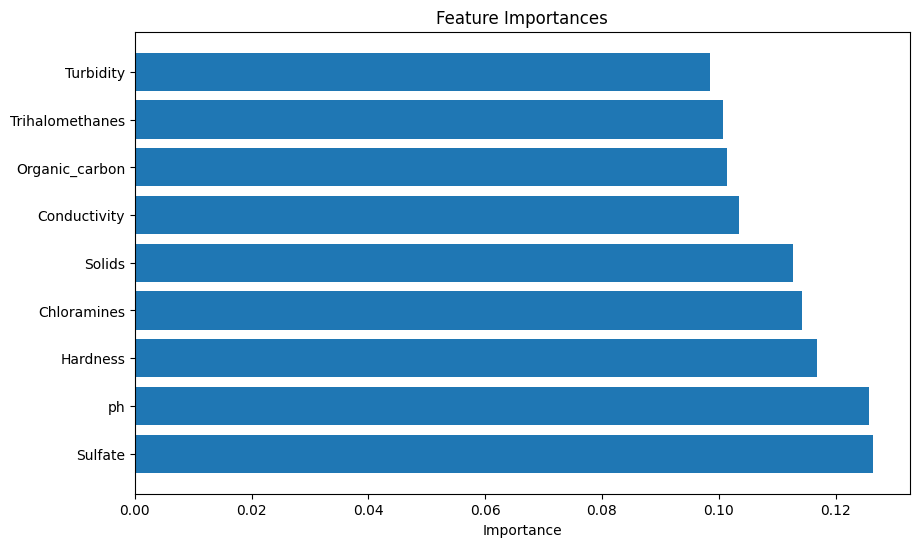

In [ ]:
#ExtraTreesClassifier
model = ExtraTreesClassifier()

# Fit the model on your data
model.fit(X, y)

# Feature importances
feature_importances = model.feature_importances_

# Displaying feature importances
feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

# Selecting features based on importance threshold (e.g., 0.11)
selected_features = feature_importances_df[feature_importances_df['Importance'] > 0.11]['Feature'].tolist()

# Creating a new DataFrame with selected features
X_selected = df[selected_features]

# Now X_selected contains the selected features for further analysis

#Now Apply CNN on new selected features

Epoch 1/100
41/41 [==============================] - 1s 8ms/step - loss: 0.6889 - accuracy: 0.5557 - val_loss: 0.6577 - val_accuracy: 0.6341
Epoch 2/100
41/41 [==============================] - 0s 4ms/step - loss: 0.6494 - accuracy: 0.6359 - val_loss: 0.6323 - val_accuracy: 0.6662
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6272 - accuracy: 0.6695 - val_loss: 0.6134 - val_accuracy: 0.6936
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6113 - accuracy: 0.6790 - val_loss: 0.6021 - val_accuracy: 0.6890
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6026 - accuracy: 0.6798 - val_loss: 0.5935 - val_accuracy: 0.6997
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5966 - accuracy: 0.6893 - val_loss: 0.5898 - val_accuracy: 0.7027
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5920 - accuracy: 0.6905 - val_loss: 0.5894 - val_accuracy: 0.6966
Epoch 8/100
4

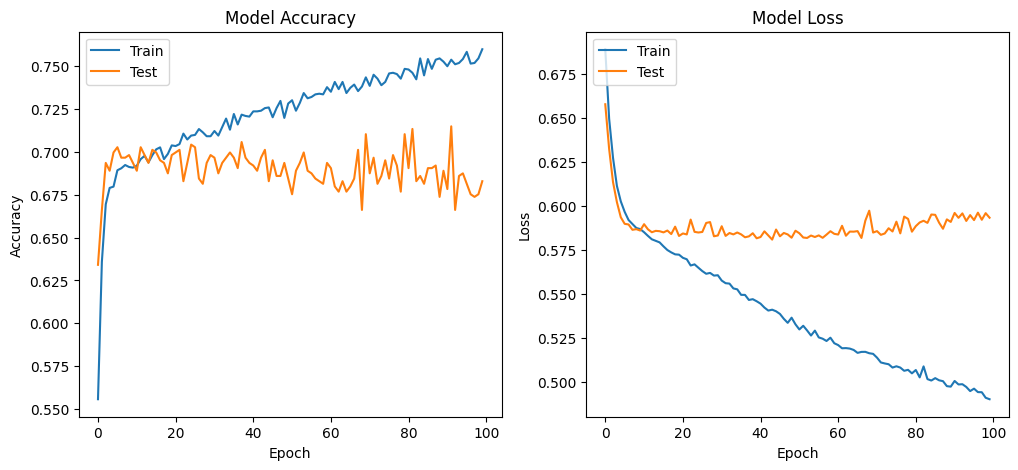

21/21 [==============================] - 0s 2ms/step
Accuracy: 0.6829
Precision: 0.5928
Recall: 0.4713
F1 Score: 0.5251
Specificity: 0.8083


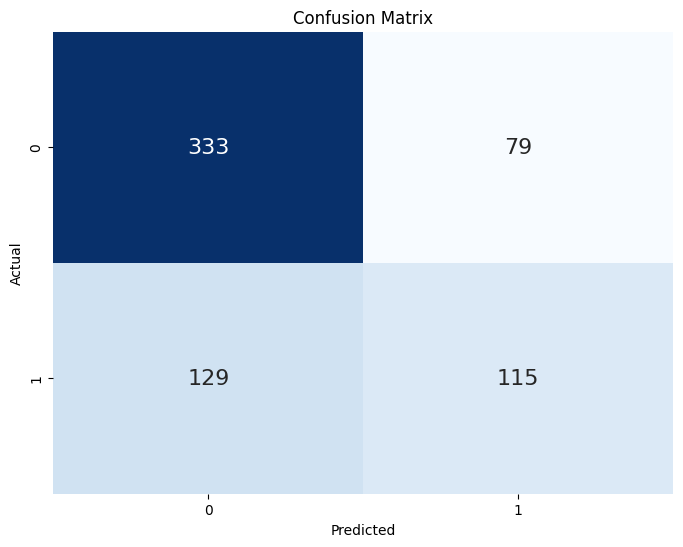

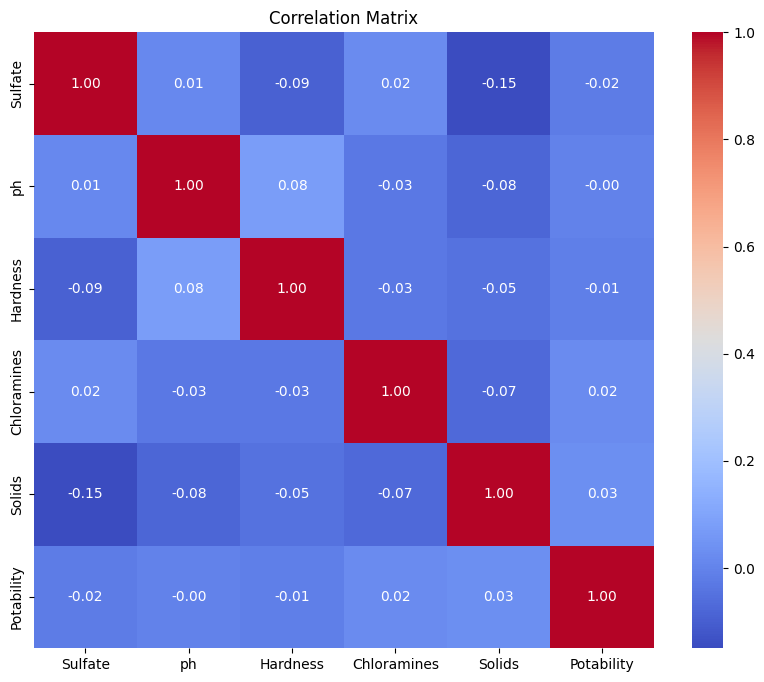

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# features and target variable

features=selected_features
X = X_selected
y = df['Potability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=len(features)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_data=(X_test_scaled, y_test))

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])

# Print Metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Specificity: {specificity:.4f}')

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Correlation Matrix
correlation_matrix = df[features + ['Potability']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()


#CNN LSTM

Epoch 1/100
41/41 [==============================] - 2s 14ms/step - loss: 0.6821 - accuracy: 0.5863 - val_loss: 0.6651 - val_accuracy: 0.6280
Epoch 2/100
41/41 [==============================] - 0s 7ms/step - loss: 0.6688 - accuracy: 0.6061 - val_loss: 0.6529 - val_accuracy: 0.6296
Epoch 3/100
41/41 [==============================] - 0s 6ms/step - loss: 0.6513 - accuracy: 0.6168 - val_loss: 0.6337 - val_accuracy: 0.6418
Epoch 4/100
41/41 [==============================] - 0s 7ms/step - loss: 0.6323 - accuracy: 0.6481 - val_loss: 0.6280 - val_accuracy: 0.6524
Epoch 5/100
41/41 [==============================] - 0s 8ms/step - loss: 0.6194 - accuracy: 0.6557 - val_loss: 0.6162 - val_accuracy: 0.6616
Epoch 6/100
41/41 [==============================] - 0s 7ms/step - loss: 0.6215 - accuracy: 0.6595 - val_loss: 0.6096 - val_accuracy: 0.6631
Epoch 7/100
41/41 [==============================] - 0s 8ms/step - loss: 0.6122 - accuracy: 0.6664 - val_loss: 0.6097 - val_accuracy: 0.6631
Epoch 8/100


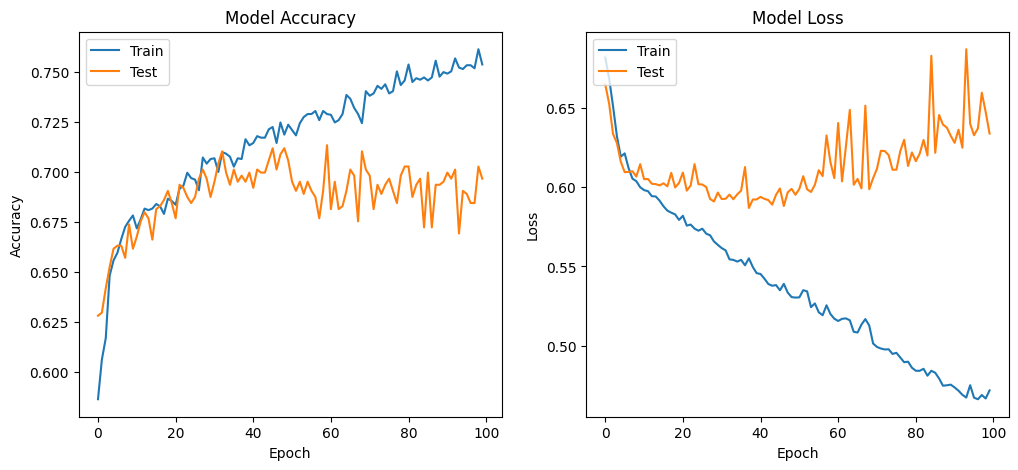

21/21 [==============================] - 0s 2ms/step
Accuracy: 0.6966
Precision: 0.6216
Recall: 0.4713
F1 Score: 0.5361
Specificity: 0.8301


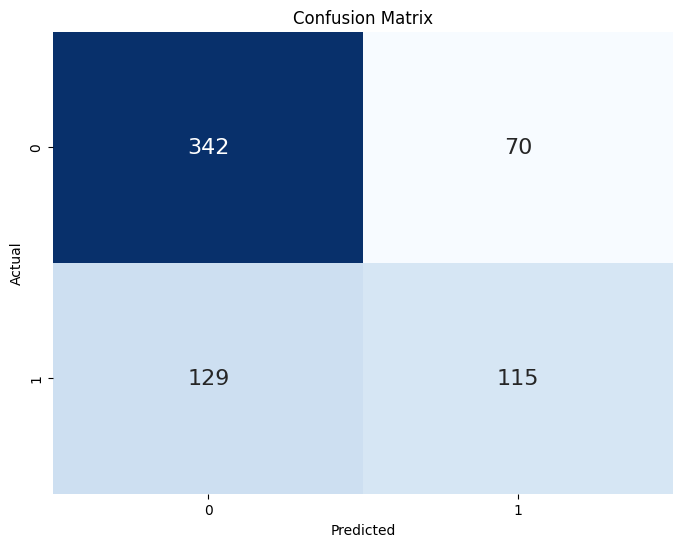

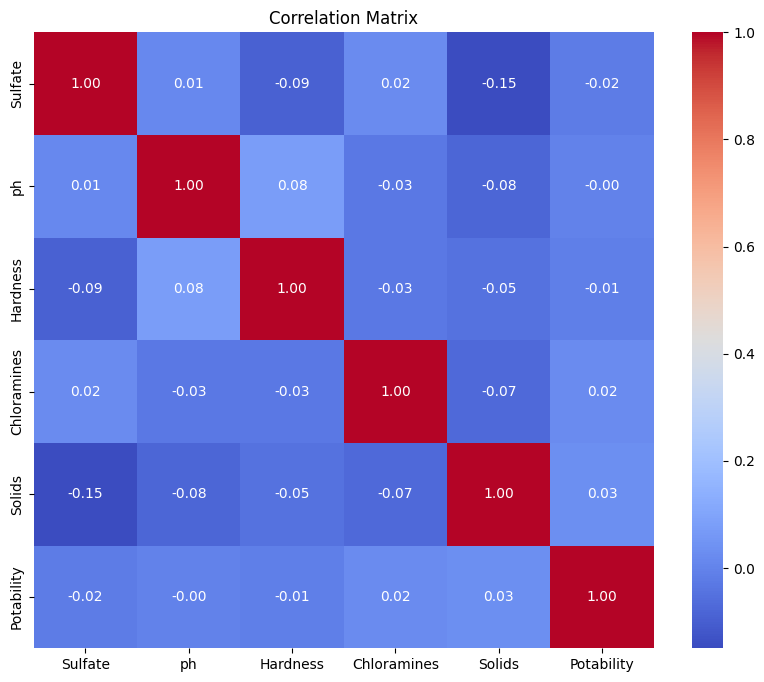

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Flatten

# features and target variable
features=selected_features
X = X_selected
y = df['Potability']


# Assuming df is your DataFrame containing the data
# features and target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN-LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build a CNN-LSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, validation_data=(X_test_reshaped, y_test))

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Predictions
y_pred = (model.predict(X_test_reshaped) > 0.5).astype("int32")

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])

# Print Metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Specificity: {specificity:.4f}')

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Correlation Matrix
correlation_matrix = df[features + ['Potability']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()


#CNN GRU

Epoch 1/100
41/41 [==============================] - 4s 21ms/step - loss: 0.6786 - accuracy: 0.6038 - val_loss: 0.6636 - val_accuracy: 0.6280
Epoch 2/100
41/41 [==============================] - 0s 10ms/step - loss: 0.6686 - accuracy: 0.6069 - val_loss: 0.6597 - val_accuracy: 0.6326
Epoch 3/100
41/41 [==============================] - 0s 8ms/step - loss: 0.6600 - accuracy: 0.6149 - val_loss: 0.6429 - val_accuracy: 0.6357
Epoch 4/100
41/41 [==============================] - 0s 8ms/step - loss: 0.6441 - accuracy: 0.6290 - val_loss: 0.6227 - val_accuracy: 0.6509
Epoch 5/100
41/41 [==============================] - 0s 7ms/step - loss: 0.6256 - accuracy: 0.6531 - val_loss: 0.6098 - val_accuracy: 0.6814
Epoch 6/100
41/41 [==============================] - 0s 7ms/step - loss: 0.6160 - accuracy: 0.6672 - val_loss: 0.6015 - val_accuracy: 0.6845
Epoch 7/100
41/41 [==============================] - 0s 7ms/step - loss: 0.6142 - accuracy: 0.6752 - val_loss: 0.6027 - val_accuracy: 0.6677
Epoch 8/100

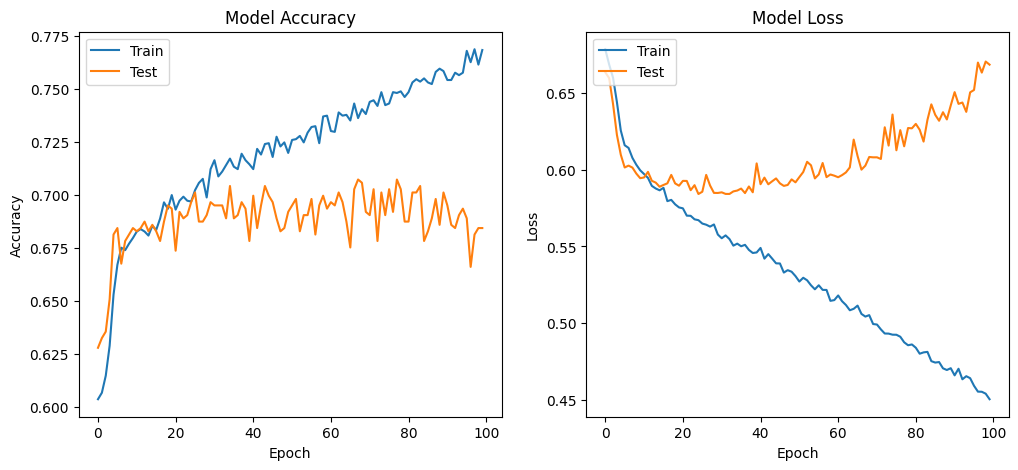

21/21 [==============================] - 0s 2ms/step
Accuracy: 0.6845
Precision: 0.5830
Recall: 0.5328
F1 Score: 0.5567
Specificity: 0.7743


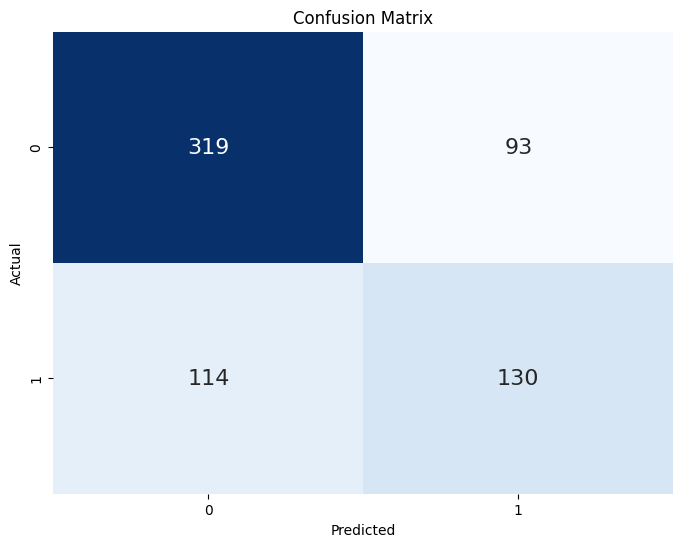

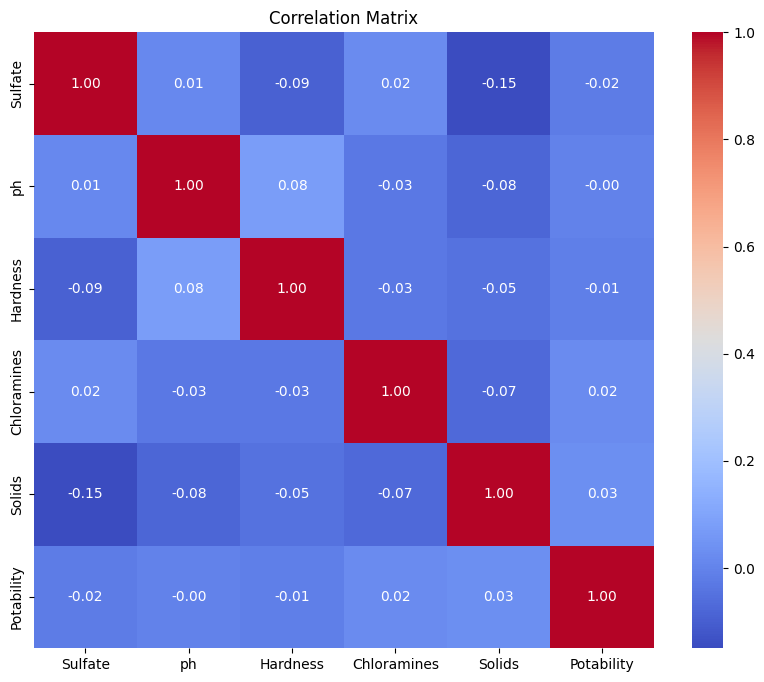

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, GRU, Flatten

# features and target variable
features=selected_features
X = X_selected
y = df['Potability']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN-GRU
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build a CNN-GRU model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model.add(GRU(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, validation_data=(X_test_reshaped, y_test))

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Predictions
y_pred = (model.predict(X_test_reshaped) > 0.5).astype("int32")

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])

# Print Metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Specificity: {specificity:.4f}')

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Correlation Matrix
correlation_matrix = df[features + ['Potability']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()


#DNN

Epoch 1/100
41/41 [==============================] - 46s 8ms/step - loss: 0.6739 - accuracy: 0.5832 - val_loss: 0.6349 - val_accuracy: 0.6707
Epoch 2/100
41/41 [==============================] - 0s 4ms/step - loss: 0.6194 - accuracy: 0.6718 - val_loss: 0.5996 - val_accuracy: 0.6814
Epoch 3/100
41/41 [==============================] - 0s 4ms/step - loss: 0.6004 - accuracy: 0.6836 - val_loss: 0.5904 - val_accuracy: 0.6982
Epoch 4/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5939 - accuracy: 0.6870 - val_loss: 0.5862 - val_accuracy: 0.7027
Epoch 5/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5872 - accuracy: 0.6947 - val_loss: 0.5887 - val_accuracy: 0.6966
Epoch 6/100
41/41 [==============================] - 0s 5ms/step - loss: 0.5822 - accuracy: 0.6981 - val_loss: 0.5874 - val_accuracy: 0.7012
Epoch 7/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5782 - accuracy: 0.7042 - val_loss: 0.5845 - val_accuracy: 0.7058
Epoch 8/100


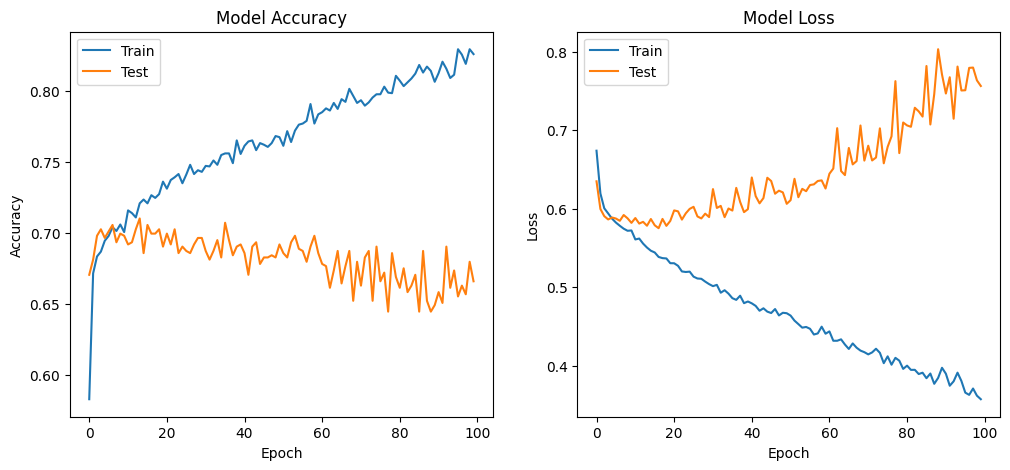

21/21 [==============================] - 0s 3ms/step
Accuracy: 0.6662
Precision: 0.5592
Recall: 0.4836
F1 Score: 0.5187
Specificity: 0.7743


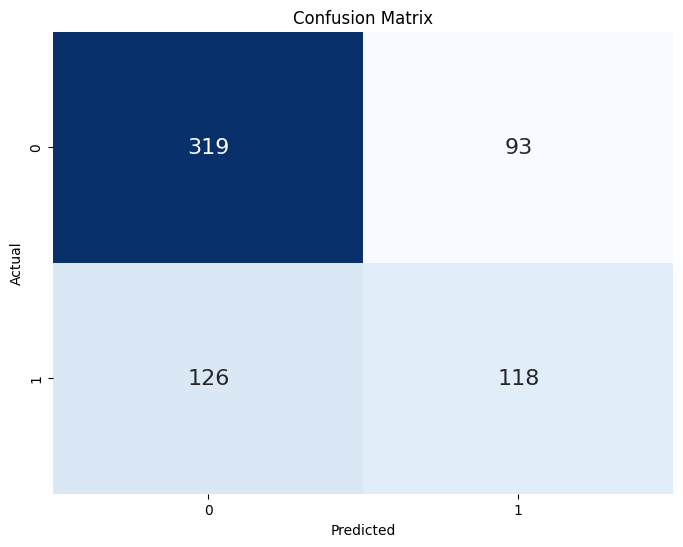

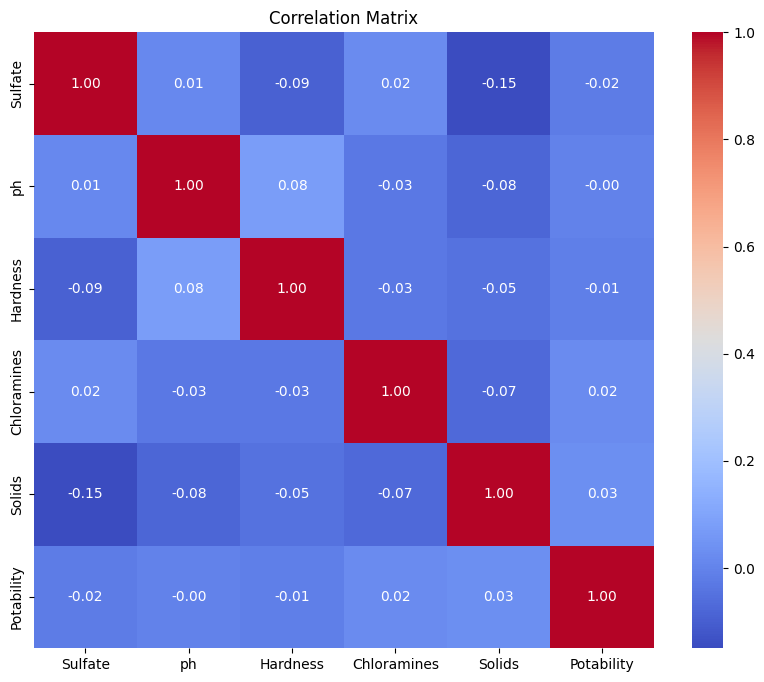

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# features and target variable
features=selected_features
X = X_selected
y = df['Potability']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a deep neural network (DNN)
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=len(features)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_data=(X_test_scaled, y_test))

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])

# Print Metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Specificity: {specificity:.4f}')

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Correlation Matrix
correlation_matrix = df[features + ['Potability']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()


# Gradient Boosting Classifier || Based on results threshold is 0.11 for our Dataset

---
Following is the feature selection process with Gradient Boosting Classifier.


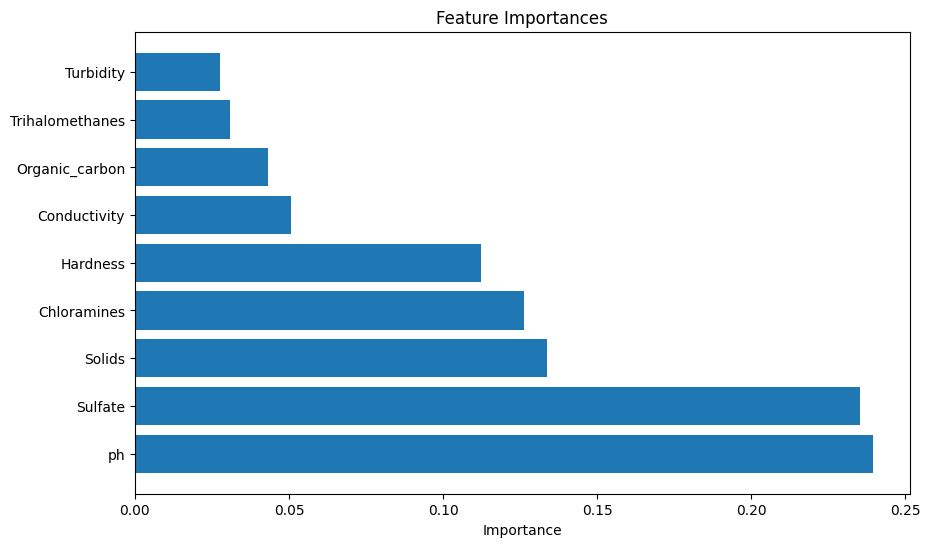

In [ ]:
df=df_filled
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
X = df[features]
y = df['Potability']
#GradientBoostingClassifier
model = GradientBoostingClassifier()

# Fit the model on your data
model.fit(X, y)

# Feature importances
feature_importances = model.feature_importances_

# Displaying feature importances
feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

# Selecting features based on importance threshold (e.g., 0.11)
selected_features = feature_importances_df[feature_importances_df['Importance'] > 0.11]['Feature'].tolist()

# Creating a new DataFrame with selected features
X_selected = df[selected_features]

# Now X_selected contains the selected features for further analysis

#Now Apply CNN on new selected features

Epoch 1/100
41/41 [==============================] - 1s 7ms/step - loss: 0.6832 - accuracy: 0.5779 - val_loss: 0.6519 - val_accuracy: 0.6418
Epoch 2/100
41/41 [==============================] - 0s 4ms/step - loss: 0.6495 - accuracy: 0.6351 - val_loss: 0.6317 - val_accuracy: 0.6723
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6309 - accuracy: 0.6584 - val_loss: 0.6147 - val_accuracy: 0.6860
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6166 - accuracy: 0.6698 - val_loss: 0.6034 - val_accuracy: 0.6951
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6057 - accuracy: 0.6874 - val_loss: 0.5948 - val_accuracy: 0.6905
Epoch 6/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5990 - accuracy: 0.6866 - val_loss: 0.5888 - val_accuracy: 0.6936
Epoch 7/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5946 - accuracy: 0.6901 - val_loss: 0.5869 - val_accuracy: 0.6982
Epoch 8/100
4

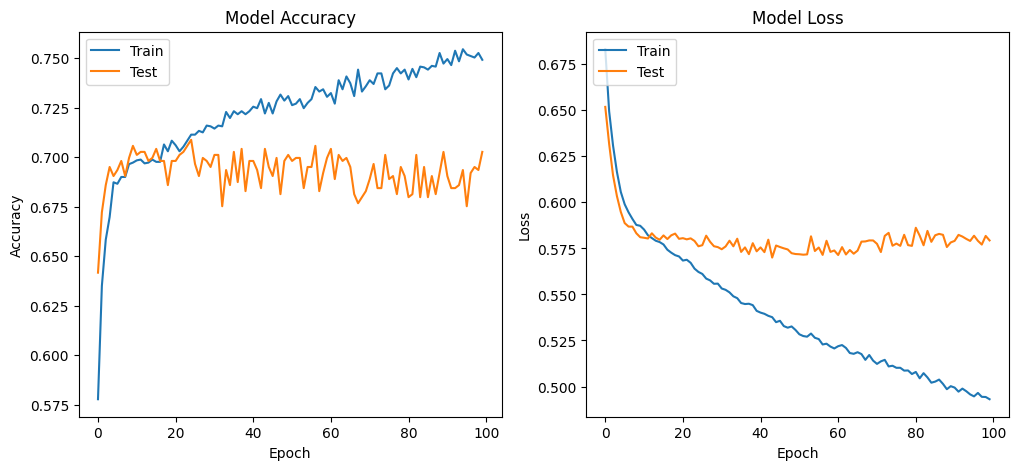

21/21 [==============================] - 0s 2ms/step
Accuracy: 0.7027
Precision: 0.6467
Recall: 0.4426
F1 Score: 0.5255
Specificity: 0.8568


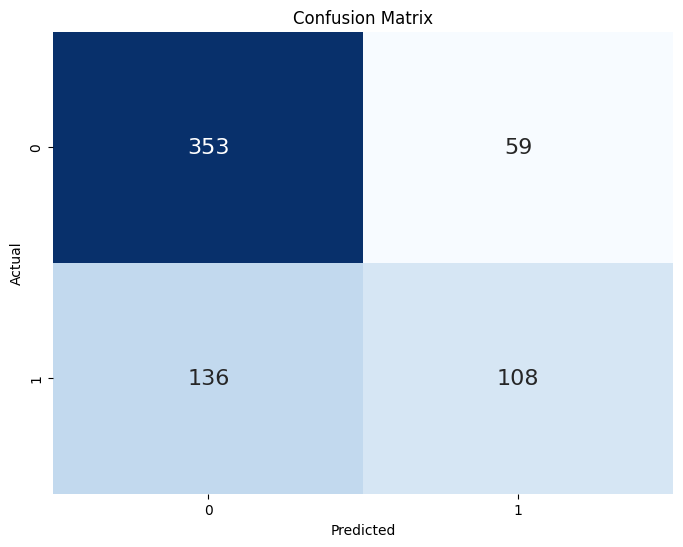

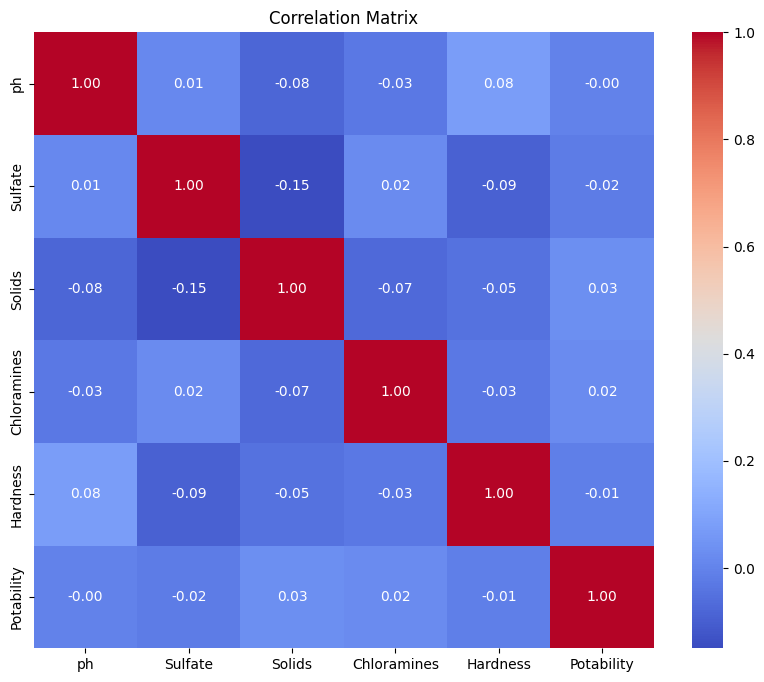

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# features and target variable

features=selected_features
X = X_selected
y = df['Potability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=len(features)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_data=(X_test_scaled, y_test))

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])

# Print Metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Specificity: {specificity:.4f}')

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Correlation Matrix
correlation_matrix = df[features + ['Potability']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()


#CNN LSTM

Epoch 1/100
41/41 [==============================] - 4s 21ms/step - loss: 0.6818 - accuracy: 0.5844 - val_loss: 0.6656 - val_accuracy: 0.6280
Epoch 2/100
41/41 [==============================] - 0s 8ms/step - loss: 0.6682 - accuracy: 0.6057 - val_loss: 0.6542 - val_accuracy: 0.6326
Epoch 3/100
41/41 [==============================] - 0s 7ms/step - loss: 0.6499 - accuracy: 0.6294 - val_loss: 0.6256 - val_accuracy: 0.6616
Epoch 4/100
41/41 [==============================] - 0s 8ms/step - loss: 0.6362 - accuracy: 0.6496 - val_loss: 0.6168 - val_accuracy: 0.6677
Epoch 5/100
41/41 [==============================] - 0s 8ms/step - loss: 0.6294 - accuracy: 0.6496 - val_loss: 0.6175 - val_accuracy: 0.6662
Epoch 6/100
41/41 [==============================] - 0s 8ms/step - loss: 0.6245 - accuracy: 0.6634 - val_loss: 0.6105 - val_accuracy: 0.6662
Epoch 7/100
41/41 [==============================] - 0s 11ms/step - loss: 0.6209 - accuracy: 0.6622 - val_loss: 0.6133 - val_accuracy: 0.6707
Epoch 8/100

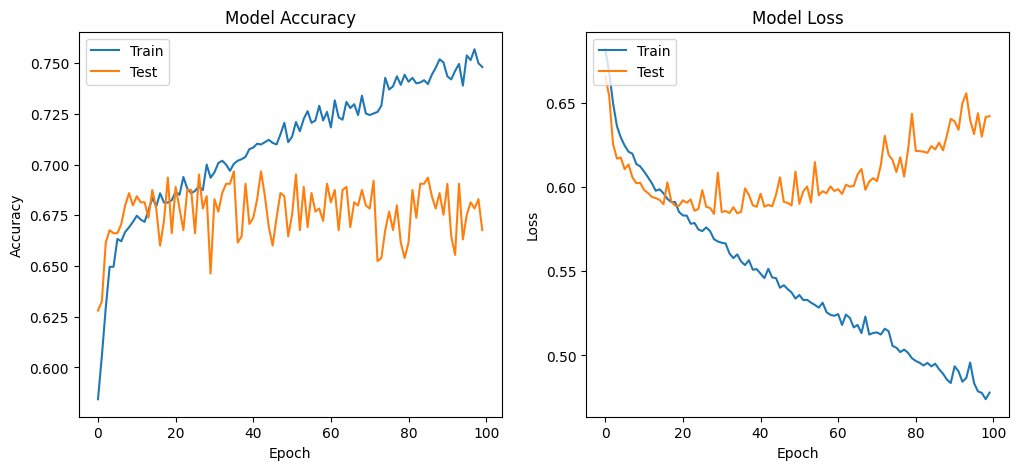

21/21 [==============================] - 0s 4ms/step
Accuracy: 0.6677
Precision: 0.5677
Recall: 0.4467
F1 Score: 0.5000
Specificity: 0.7985


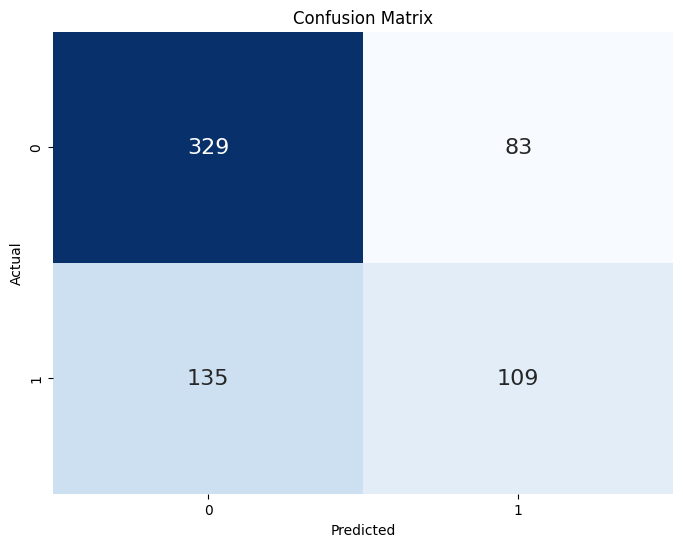

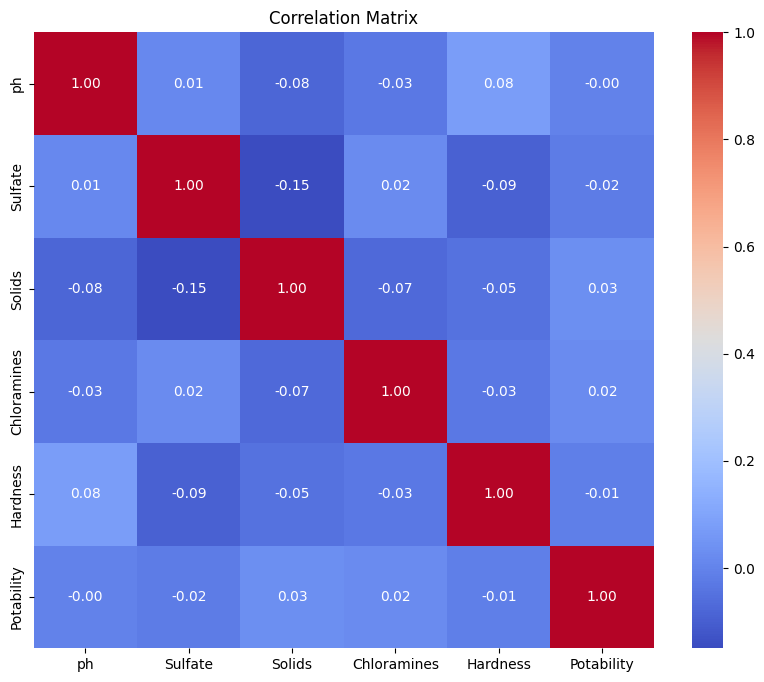

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Flatten

# features and target variable
features=selected_features
X = X_selected
y = df['Potability']


# Assuming df is your DataFrame containing the data
# features and target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN-LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build a CNN-LSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, validation_data=(X_test_reshaped, y_test))

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Predictions
y_pred = (model.predict(X_test_reshaped) > 0.5).astype("int32")

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])

# Print Metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Specificity: {specificity:.4f}')

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Correlation Matrix
correlation_matrix = df[features + ['Potability']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()


#CNN GRU

Epoch 1/100
41/41 [==============================] - 2s 13ms/step - loss: 0.6785 - accuracy: 0.5912 - val_loss: 0.6630 - val_accuracy: 0.6280
Epoch 2/100
41/41 [==============================] - 0s 7ms/step - loss: 0.6636 - accuracy: 0.6118 - val_loss: 0.6544 - val_accuracy: 0.6311
Epoch 3/100
41/41 [==============================] - 0s 8ms/step - loss: 0.6502 - accuracy: 0.6298 - val_loss: 0.6329 - val_accuracy: 0.6479
Epoch 4/100
41/41 [==============================] - 0s 7ms/step - loss: 0.6350 - accuracy: 0.6557 - val_loss: 0.6183 - val_accuracy: 0.6631
Epoch 5/100
41/41 [==============================] - 0s 8ms/step - loss: 0.6249 - accuracy: 0.6660 - val_loss: 0.6104 - val_accuracy: 0.6662
Epoch 6/100
41/41 [==============================] - 0s 7ms/step - loss: 0.6188 - accuracy: 0.6672 - val_loss: 0.6085 - val_accuracy: 0.6585
Epoch 7/100
41/41 [==============================] - 0s 6ms/step - loss: 0.6105 - accuracy: 0.6706 - val_loss: 0.6036 - val_accuracy: 0.6646
Epoch 8/100


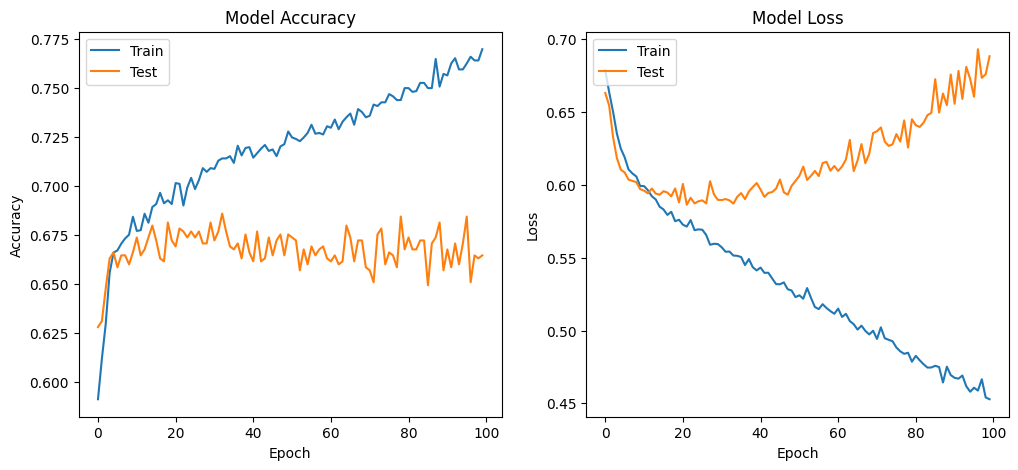

21/21 [==============================] - 0s 2ms/step
Accuracy: 0.6646
Precision: 0.5659
Recall: 0.4221
F1 Score: 0.4836
Specificity: 0.8083


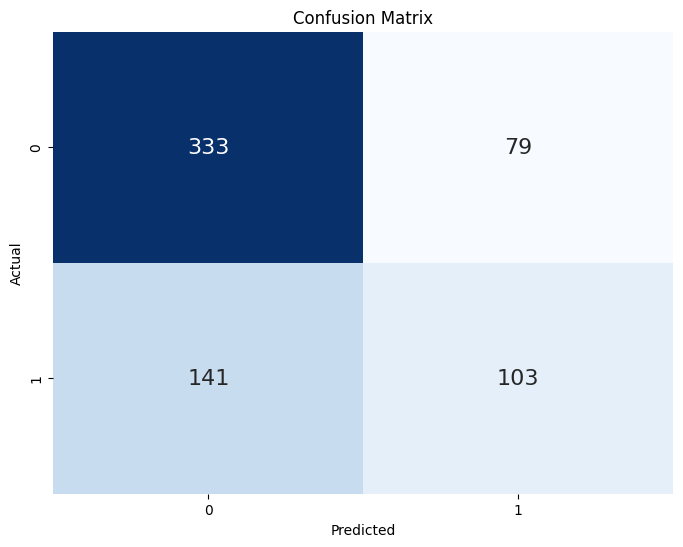

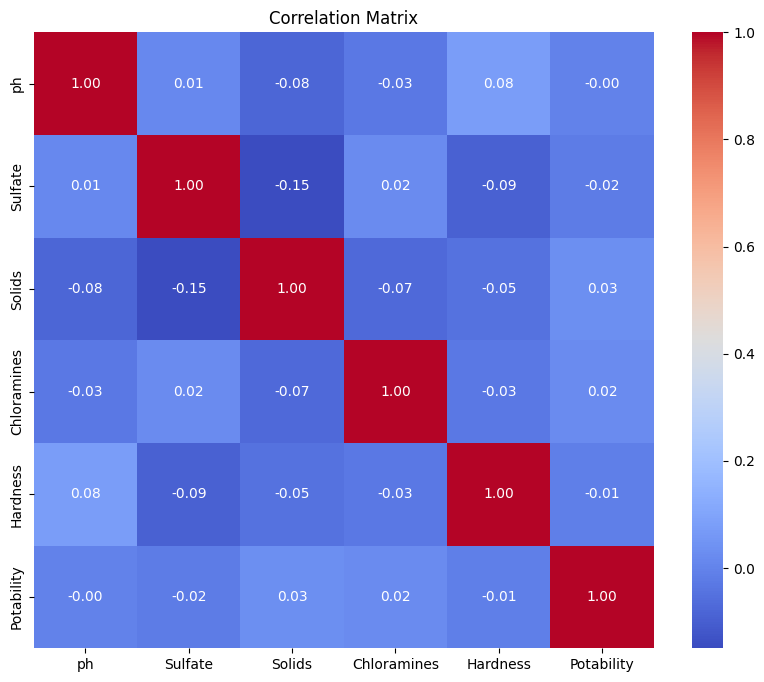

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, GRU, Flatten

# features and target variable
features=selected_features
X = X_selected
y = df['Potability']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN-GRU
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build a CNN-GRU model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model.add(GRU(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, validation_data=(X_test_reshaped, y_test))

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Predictions
y_pred = (model.predict(X_test_reshaped) > 0.5).astype("int32")

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])

# Print Metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Specificity: {specificity:.4f}')

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Correlation Matrix
correlation_matrix = df[features + ['Potability']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()


#DNN

Epoch 1/100
41/41 [==============================] - 1s 7ms/step - loss: 0.6535 - accuracy: 0.6225 - val_loss: 0.6202 - val_accuracy: 0.6768
Epoch 2/100
41/41 [==============================] - 0s 4ms/step - loss: 0.6153 - accuracy: 0.6805 - val_loss: 0.6070 - val_accuracy: 0.6753
Epoch 3/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5977 - accuracy: 0.6790 - val_loss: 0.5945 - val_accuracy: 0.6890
Epoch 4/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5905 - accuracy: 0.6939 - val_loss: 0.5965 - val_accuracy: 0.6829
Epoch 5/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5844 - accuracy: 0.6939 - val_loss: 0.5866 - val_accuracy: 0.6936
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5828 - accuracy: 0.7008 - val_loss: 0.5925 - val_accuracy: 0.6845
Epoch 7/100
41/41 [==============================] - 0s 6ms/step - loss: 0.5797 - accuracy: 0.6962 - val_loss: 0.5873 - val_accuracy: 0.6951
Epoch 8/100
4

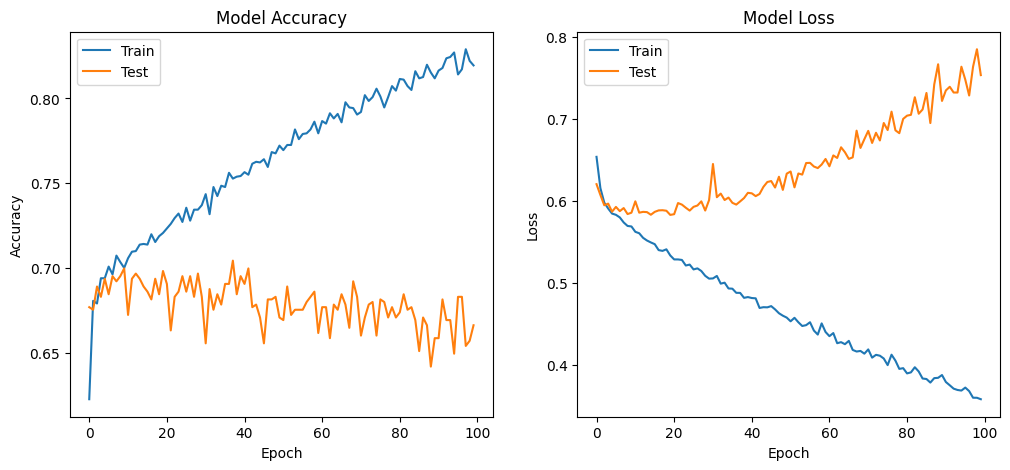

21/21 [==============================] - 0s 2ms/step
Accuracy: 0.6662
Precision: 0.5523
Recall: 0.5410
F1 Score: 0.5466
Specificity: 0.7403


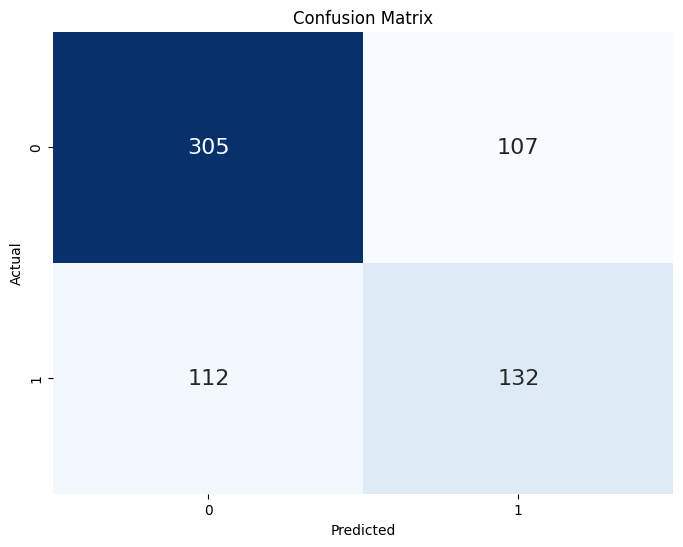

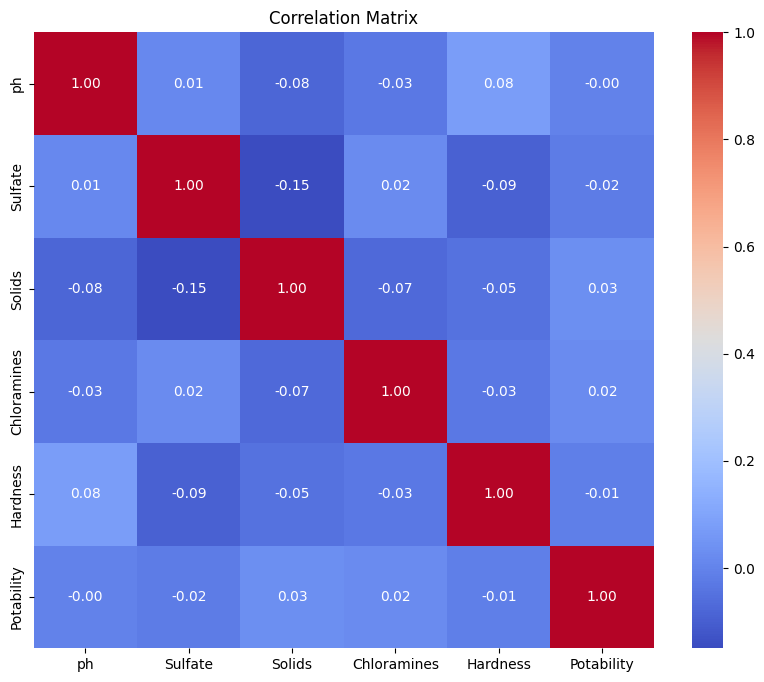

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# features and target variable
features=selected_features
X = X_selected
y = df['Potability']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a deep neural network (DNN)
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=len(features)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_data=(X_test_scaled, y_test))

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])

# Print Metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Specificity: {specificity:.4f}')

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Correlation Matrix
correlation_matrix = df[features + ['Potability']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()


# Random Forest Regressor || Based on results threshold is 0.11 for our Dataset

---
Following is the feature selection process with Gradient Boosting Classifier.


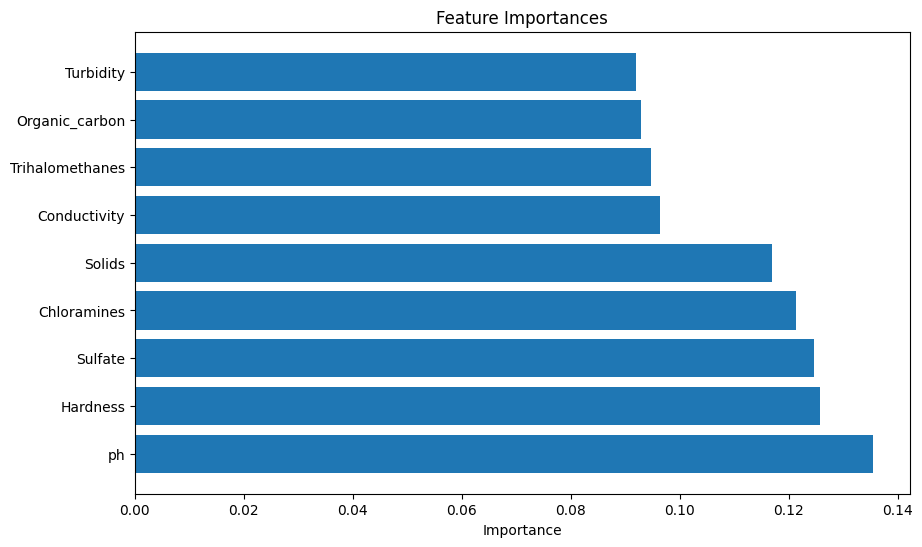

In [ ]:
df=df_filled
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
X = df[features]
y = df['Potability']
#RandomForestRegressor
model = RandomForestRegressor()

# Fit the model on your data
model.fit(X, y)

# Feature importances
feature_importances = model.feature_importances_

# Displaying feature importances
feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

# Selecting features based on importance threshold (e.g., 0.11)
selected_features = feature_importances_df[feature_importances_df['Importance'] > 0.11]['Feature'].tolist()

# Creating a new DataFrame with selected features
X_selected = df[selected_features]

# Now X_selected contains the selected features for further analysis

#Now Apply CNN on new selected features

Epoch 1/100
41/41 [==============================] - 1s 7ms/step - loss: 0.6748 - accuracy: 0.5664 - val_loss: 0.6493 - val_accuracy: 0.6326
Epoch 2/100
41/41 [==============================] - 0s 4ms/step - loss: 0.6445 - accuracy: 0.6351 - val_loss: 0.6290 - val_accuracy: 0.6799
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6232 - accuracy: 0.6645 - val_loss: 0.6095 - val_accuracy: 0.6799
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6077 - accuracy: 0.6916 - val_loss: 0.5987 - val_accuracy: 0.6875
Epoch 5/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5994 - accuracy: 0.6893 - val_loss: 0.5942 - val_accuracy: 0.6936
Epoch 6/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5934 - accuracy: 0.6950 - val_loss: 0.5903 - val_accuracy: 0.6936
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5899 - accuracy: 0.6981 - val_loss: 0.5894 - val_accuracy: 0.6951
Epoch 8/100
4

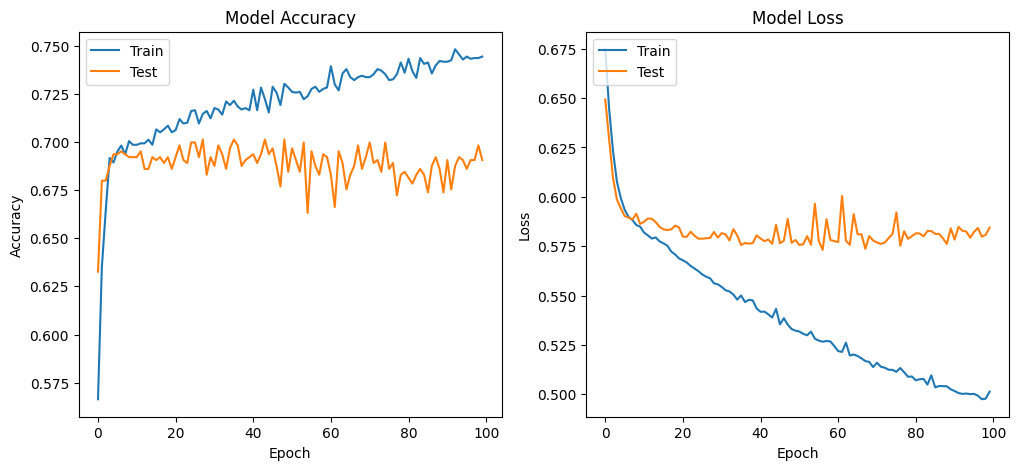

21/21 [==============================] - 0s 3ms/step
Accuracy: 0.6905
Precision: 0.6000
Recall: 0.5041
F1 Score: 0.5479
Specificity: 0.8010


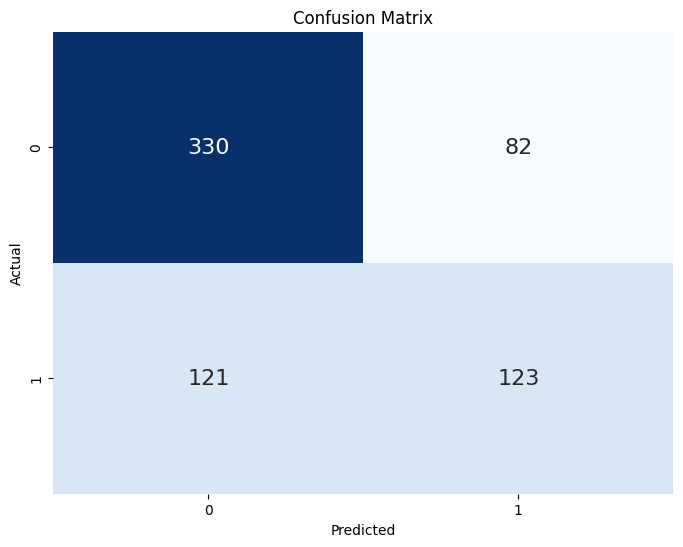

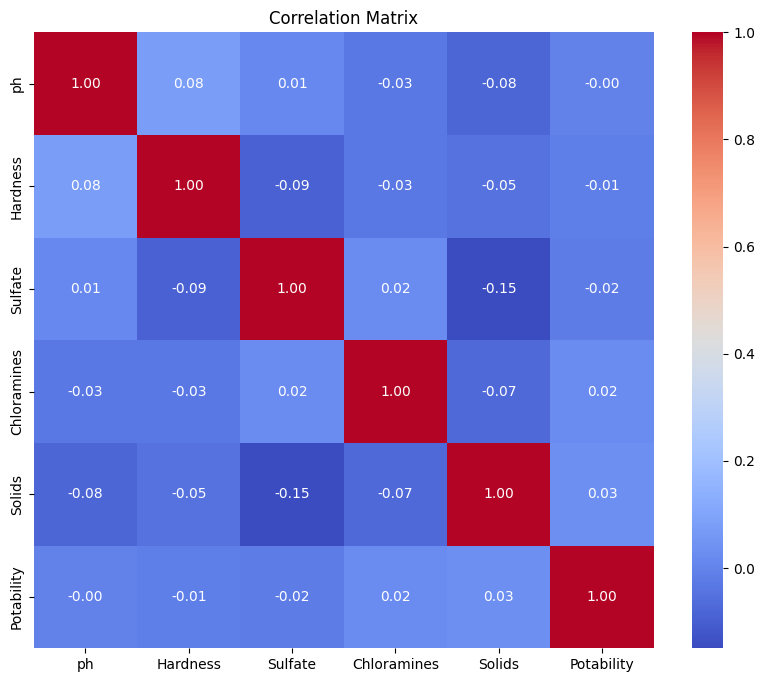

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# features and target variable

features=selected_features
X = X_selected
y = df['Potability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=len(features)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_data=(X_test_scaled, y_test))

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])

# Print Metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Specificity: {specificity:.4f}')

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Correlation Matrix
correlation_matrix = df[features + ['Potability']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()


#CNN LSTM

Epoch 1/100
41/41 [==============================] - 2s 15ms/step - loss: 0.6802 - accuracy: 0.6050 - val_loss: 0.6652 - val_accuracy: 0.6280
Epoch 2/100
41/41 [==============================] - 0s 7ms/step - loss: 0.6648 - accuracy: 0.6095 - val_loss: 0.6455 - val_accuracy: 0.6555
Epoch 3/100
41/41 [==============================] - 0s 7ms/step - loss: 0.6468 - accuracy: 0.6313 - val_loss: 0.6536 - val_accuracy: 0.6296
Epoch 4/100
41/41 [==============================] - 0s 6ms/step - loss: 0.6382 - accuracy: 0.6477 - val_loss: 0.6175 - val_accuracy: 0.6570
Epoch 5/100
41/41 [==============================] - 0s 7ms/step - loss: 0.6281 - accuracy: 0.6595 - val_loss: 0.6108 - val_accuracy: 0.6601
Epoch 6/100
41/41 [==============================] - 0s 7ms/step - loss: 0.6264 - accuracy: 0.6531 - val_loss: 0.6137 - val_accuracy: 0.6570
Epoch 7/100
41/41 [==============================] - 0s 8ms/step - loss: 0.6206 - accuracy: 0.6607 - val_loss: 0.6055 - val_accuracy: 0.6677
Epoch 8/100


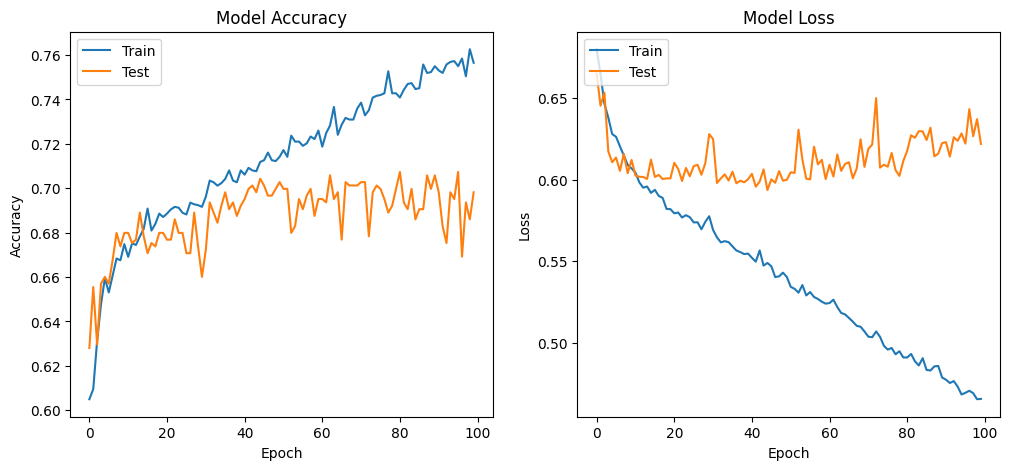

21/21 [==============================] - 0s 2ms/step
Accuracy: 0.6982
Precision: 0.6402
Recall: 0.4303
F1 Score: 0.5147
Specificity: 0.8568


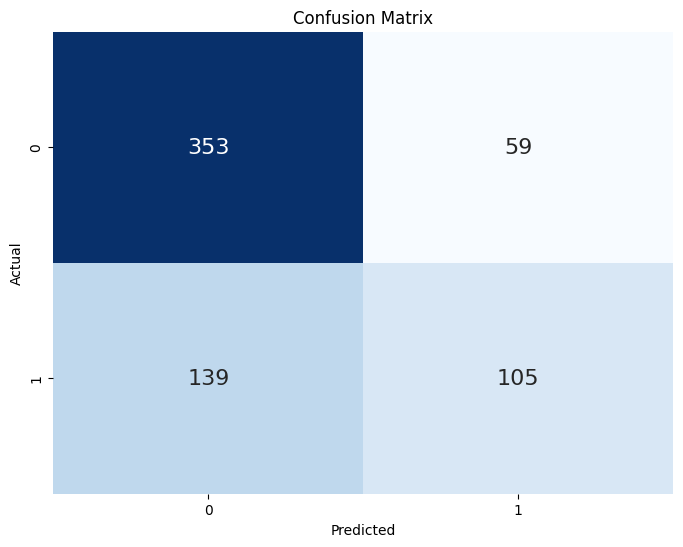

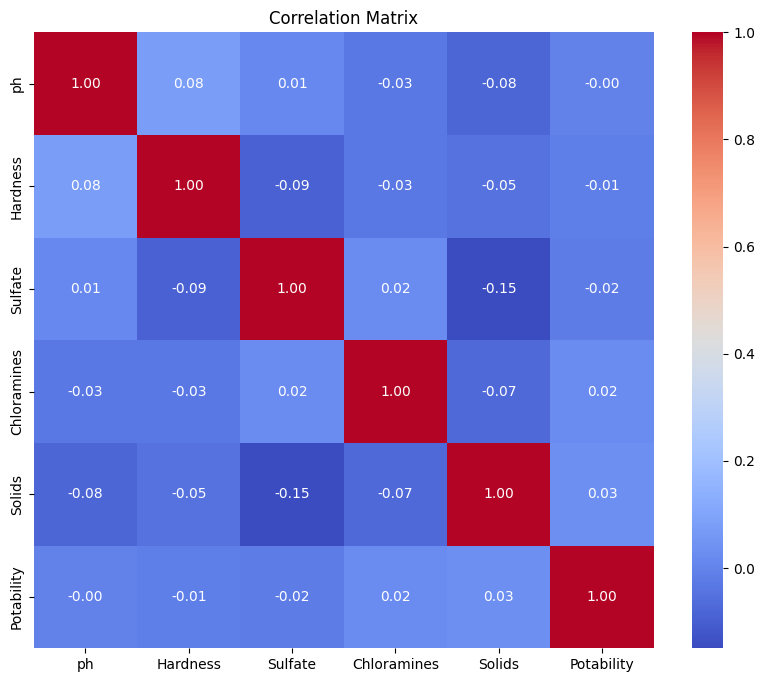

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Flatten

# features and target variable
features=selected_features
X = X_selected
y = df['Potability']


# Assuming df is your DataFrame containing the data
# features and target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN-LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build a CNN-LSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, validation_data=(X_test_reshaped, y_test))

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Predictions
y_pred = (model.predict(X_test_reshaped) > 0.5).astype("int32")

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])

# Print Metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Specificity: {specificity:.4f}')

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Correlation Matrix
correlation_matrix = df[features + ['Potability']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()


#CNN GRU

Epoch 1/100
41/41 [==============================] - 4s 22ms/step - loss: 0.6803 - accuracy: 0.5931 - val_loss: 0.6630 - val_accuracy: 0.6280
Epoch 2/100
41/41 [==============================] - 0s 9ms/step - loss: 0.6614 - accuracy: 0.6198 - val_loss: 0.6446 - val_accuracy: 0.6494
Epoch 3/100
41/41 [==============================] - 0s 8ms/step - loss: 0.6482 - accuracy: 0.6385 - val_loss: 0.6290 - val_accuracy: 0.6524
Epoch 4/100
41/41 [==============================] - 0s 6ms/step - loss: 0.6389 - accuracy: 0.6481 - val_loss: 0.6231 - val_accuracy: 0.6601
Epoch 5/100
41/41 [==============================] - 0s 6ms/step - loss: 0.6318 - accuracy: 0.6557 - val_loss: 0.6140 - val_accuracy: 0.6692
Epoch 6/100
41/41 [==============================] - 0s 6ms/step - loss: 0.6219 - accuracy: 0.6645 - val_loss: 0.6066 - val_accuracy: 0.6677
Epoch 7/100
41/41 [==============================] - 0s 7ms/step - loss: 0.6151 - accuracy: 0.6695 - val_loss: 0.6080 - val_accuracy: 0.6829
Epoch 8/100


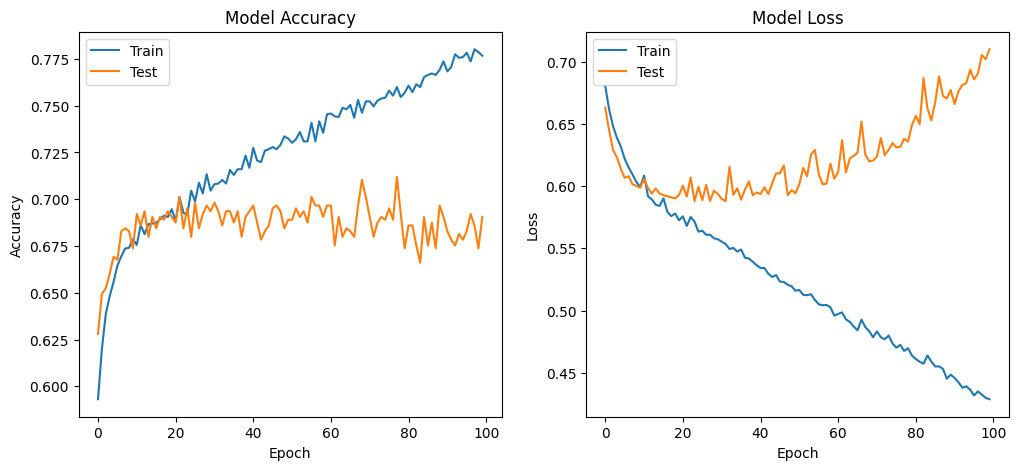

21/21 [==============================] - 0s 4ms/step
Accuracy: 0.6905
Precision: 0.6228
Recall: 0.4262
F1 Score: 0.5061
Specificity: 0.8471


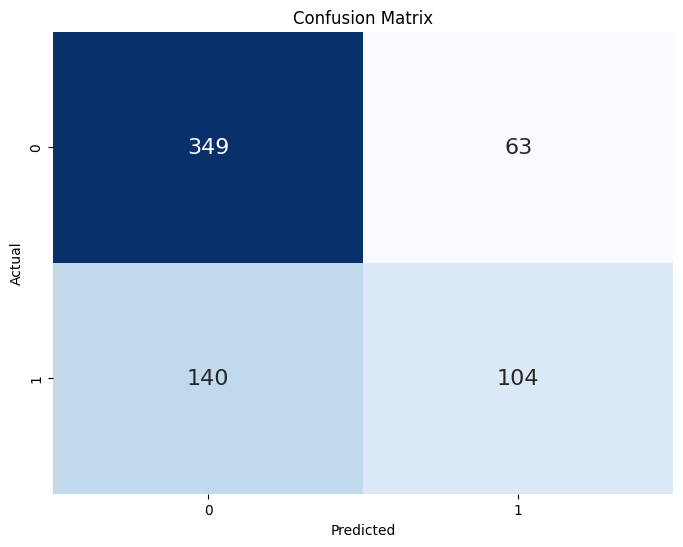

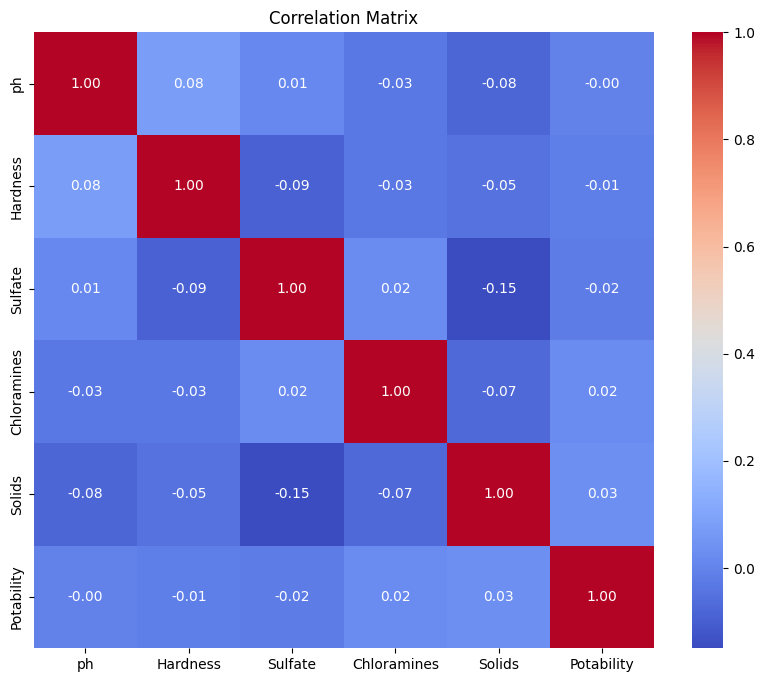

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, GRU, Flatten

# features and target variable
features=selected_features
X = X_selected
y = df['Potability']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN-GRU
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build a CNN-GRU model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model.add(GRU(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, validation_data=(X_test_reshaped, y_test))

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Predictions
y_pred = (model.predict(X_test_reshaped) > 0.5).astype("int32")

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])

# Print Metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Specificity: {specificity:.4f}')

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Correlation Matrix
correlation_matrix = df[features + ['Potability']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()


#DNN

Epoch 1/100
41/41 [==============================] - 1s 8ms/step - loss: 0.6615 - accuracy: 0.6000 - val_loss: 0.6325 - val_accuracy: 0.6418
Epoch 2/100
41/41 [==============================] - 0s 4ms/step - loss: 0.6243 - accuracy: 0.6653 - val_loss: 0.6028 - val_accuracy: 0.6921
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6033 - accuracy: 0.6763 - val_loss: 0.5883 - val_accuracy: 0.6951
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5919 - accuracy: 0.6924 - val_loss: 0.5906 - val_accuracy: 0.7027
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5874 - accuracy: 0.6985 - val_loss: 0.5885 - val_accuracy: 0.6982
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5810 - accuracy: 0.7038 - val_loss: 0.5859 - val_accuracy: 0.6951
Epoch 7/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5757 - accuracy: 0.7038 - val_loss: 0.5933 - val_accuracy: 0.6784
Epoch 8/100
4

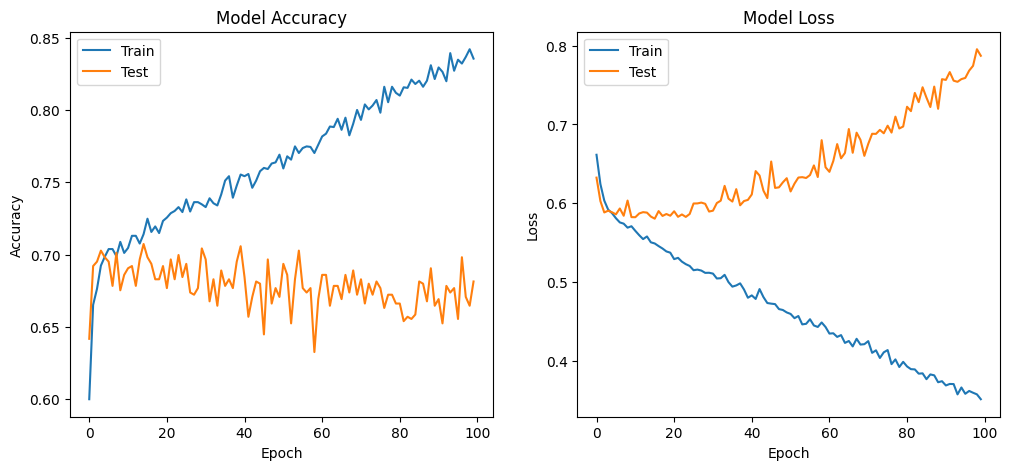

21/21 [==============================] - 0s 2ms/step
Accuracy: 0.6814
Precision: 0.5829
Recall: 0.5041
F1 Score: 0.5407
Specificity: 0.7864


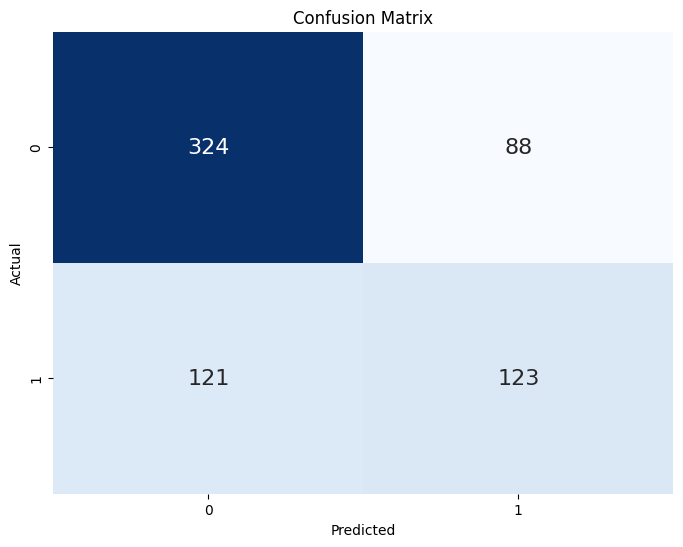

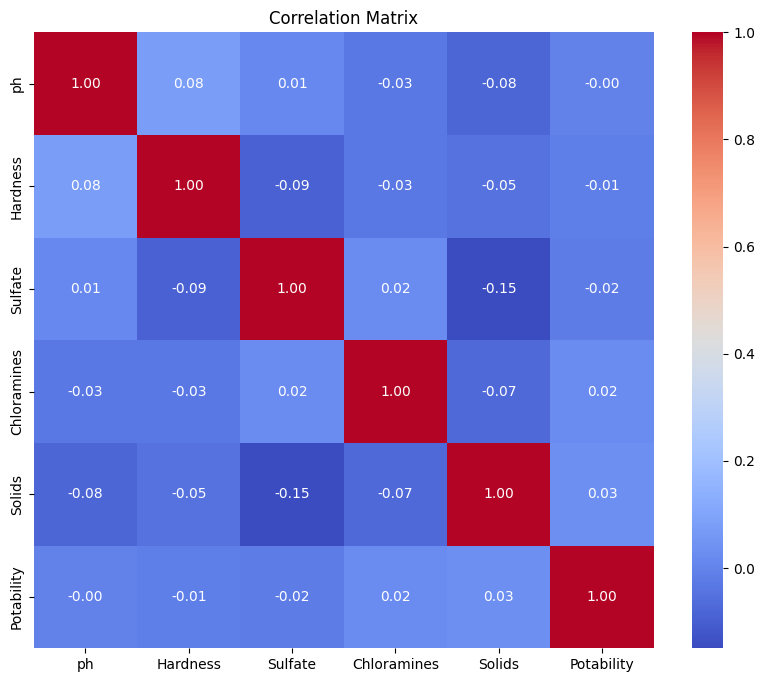

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# features and target variable
features=selected_features
X = X_selected
y = df['Potability']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a deep neural network (DNN)
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=len(features)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_data=(X_test_scaled, y_test))

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])

# Print Metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Specificity: {specificity:.4f}')

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Correlation Matrix
correlation_matrix = df[features + ['Potability']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()
